In [28]:
import pandas as pd
import numpy as np

cars = pd.read_csv('ToyotaCars.csv')
cancer = pd.read_csv('cancer.csv')
interior = pd.read_csv('Interior.csv')

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   int64  
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [5]:
cars.HP = cars.HP.astype('int64')

In [7]:
cars.MetColor = cars.MetColor.astype('object')
cars.Automatic = cars.Automatic.astype('object')

In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1436 non-null   int64  
 2   KM         1436 non-null   float64
 3   FuelType   1436 non-null   object 
 4   HP         1436 non-null   float64
 5   MetColor   1436 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 112.3+ KB


In [41]:
car_price = cars.pivot_table(
    index = cars.FuelType,
    values = 'Price',
    aggfunc = 'mean'
).round(2).sort_values('Price', ascending = False).reset_index()
car_price

,FuelType,Price
0,Diesel,10889.28
1,Petrol,10726.43
2,CNG,9584.00


In [66]:
from matplotlib.axis import YAxis
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt

figure = px.bar(
    car_price,
    x = 'FuelType',
    y = 'Price',
    title = 'Average Price of Cars by Fuel Type',
    color = 'FuelType'
)
figure.update_layout(yaxis_tickprefix = '$', yaxis_tickformat = '.2f')

In [ ]:
figure = px.pie(
    car_price,
    names = 'FuelType',
    values = 'Price',
    color = 'FuelType',
    title = 'Pie chart for Price and Fuel Type',
    height = 500,
    width=500
)
figure

In [82]:
cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Text(0, 0.5, 'Area Mean')

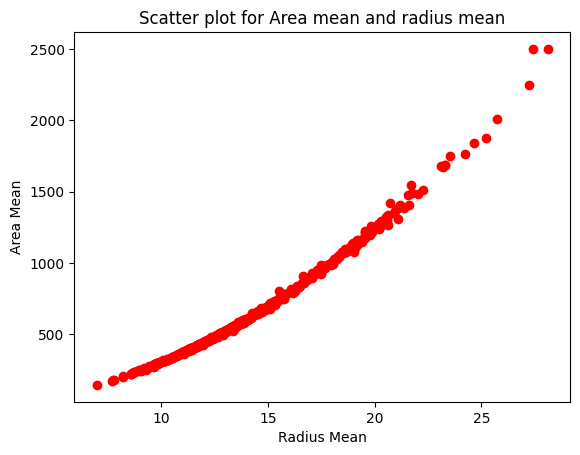

In [85]:
plt.scatter(cancer.radius_mean, cancer.area_mean, c = 'red')
plt.title('Scatter plot for Area mean and radius mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')

Text(0, 0.5, 'Compactness MEAN')

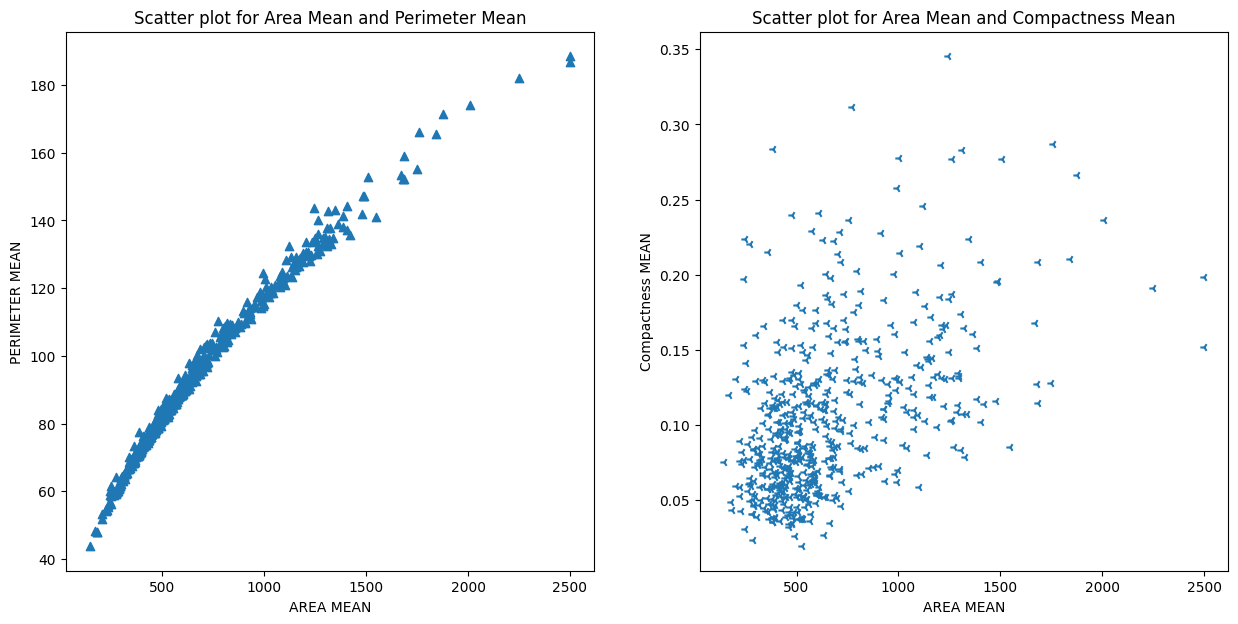

In [109]:
from pylab import *

plt.figure(figsize = (15,7))
subplot(1,2,1)
plt.scatter(cancer.area_mean, cancer.perimeter_mean, marker = '^')
plt.title('Scatter plot for Area Mean and Perimeter Mean')
plt.xlabel('AREA MEAN')
plt.ylabel('PERIMETER MEAN')

subplot(1,2,2)
plt.scatter(cancer.area_mean, cancer.compactness_mean, marker = '3')
plt.title('Scatter plot for Area Mean and Compactness Mean')
plt.xlabel('AREA MEAN')
plt.ylabel('Compactness MEAN')
